### LEAD SCORING CASE STUDY IIIT_B - ANANTAKUMAAR V R & SAMBRIT SAHA

- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
- Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Data Understanding

- Import the required algorithms for further visulaization purposes

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns',False)

In [2]:
# Understanding the data by creating the dataframe
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Using info() method to determine the aspects of a column in a data
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Using describe() method to find the standard deviation,min,max,mean,etc., of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Finally to find shape of the data containing rows and columns
lead.shape

(9240, 37)

- Therefore in the lead data there are 9240 rows and 37 columns respectively.
- So far, we have seen and understood the data completely.
- Now it is time to clean the data for further processing and visualization.

### Data Cleaning

- We can see from the data, some dataframe contain 'Select' values which means they are missing values. 
- The 'Select' values should be replaced with 'nan' so it will be easy to calculate the missing values in the data.

In [6]:
lead = lead.replace('Select',np.nan)

In [7]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# 'Select' is replaced by NaN. Now to calculate the percentage of the missing values in the data in descending order
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

- As we can clearly see that are lot of missing values in the data. By keeping a threshold of 40% and above columns containing missing values will be taken out respectively.
- But before that we have to check if any duplicate values are present in the data.

In [9]:
# Duplicate values
lead.loc[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [10]:
# Removing columns
cols=lead.columns[round((lead.isnull().sum()/len(lead))*100)>=40]
lead=lead.drop(cols,1)

In [11]:
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values(ascending = False)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

- The columns with more than 40% missing values are taken out.

In [12]:
# Now to proceed by dropping some columns which are not important to the data. 'Tags' column is to be dropped
lead.drop('Tags',1,inplace=True)

In [13]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


- After dropping the column, we can see the columns 'Country' which contains names of different countries. But clearly not sure how much is present
- So using value_counts functions to count the number of countries present in the column

In [14]:
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [15]:
# India is seen to be having a highest value count. So imputing nan values as India in country column
lead['Country']=lead['Country'].replace(np.nan,'India')

In [18]:
# Finding the value_count in 'Specialization' column
lead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [19]:
# Same as previous column, we find that Finance Management has highest count
# So imputing 'NaN' values with 'Finance Management' in Specailization column
lead['Specialization']=lead['Specialization'].replace(np.nan,'Finance Management')

In [20]:
# Now by following the same steps by imputing for other columns which has the highest value count.
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [21]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Unemployed')

In [23]:
# Next Column
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
# But we can see that in column, 'What matters most to you in choosing a course' it seems mostly all the value contain the same value.
# So it is better to drop the column for better understanding.
lead.drop('What matters most to you in choosing a course',1,inplace=True)

In [25]:
# Now proceeding for the next column
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [26]:
# Imputing the highest value count 'Email Opened' using fillna function
lead['Last Activity'] = lead['Last Activity'].fillna('Email Opened')

In [27]:
# Next Column
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [28]:
# Imputing the highest value 'Google'
lead['Lead Source']=lead['Lead Source'].replace(np.nan,'Google')

In [29]:
lead['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [30]:
# But we can see that there are two google present such as 'Google' & 'google'.
# It is of the same type so replacing it will be better option for further processing
lead['Lead Source']=lead['Lead Source'].replace('google','Google')

In [31]:
lead['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

- Now the condition is satisfied

In [32]:
# Now to use describe function for the column 'Total Time Spent on Website' for better understanding
lead['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

- Now that the missing values are replaced, columns dropped and imputing the highest value count in particular columns, it's time to find the outliers in the given data

### Analyzation of Outliers in the Data

- As used in the previous row, the outliers will be used to plot for the columns such as 'Total Time Spent on Website', 'TotalVisits' and 'Page Views Per Visit' to find how much outliers are present.

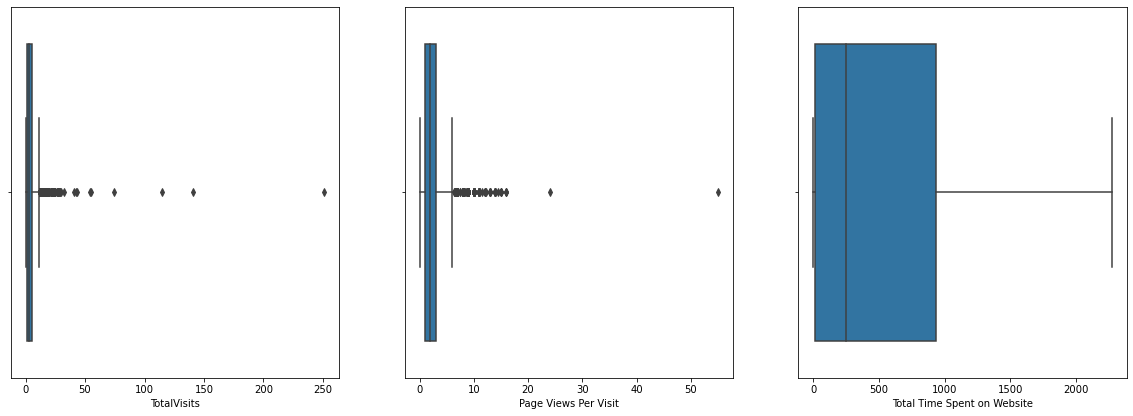

In [34]:
plt.figure(figsize = (20,15))
plt.subplot(2,3,1)
sns.boxplot(lead['TotalVisits'])
plt.subplot(2,3,2)
sns.boxplot(lead['Page Views Per Visit'])
plt.subplot(2,3,3)
sns.boxplot(lead['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

In [35]:
# By comparing the colmns, we can clearly state the there are more outliers in column 'TotalVisits' and 'Page Views Per Visit'.
# These outlier value should be adjusted by using the median function with comparison to 'Total Time Spent on Website'.
# Now to fill the missing values using median function
lead['TotalVisits']=lead['TotalVisits'].fillna(lead['TotalVisits'].median())
lead['Page Views Per Visit']=lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median())

In [38]:
# Now that the missing values are replalced, we have we analyze which columns have missing values or null values
round(100*(lead.isnull().sum()/len(lead)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [39]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


- We can see, that the column 'Prospect ID' can be dropped eventhough it has unique values
- But for visualization purposes, index values can be used instead.
- So 'Lead Number' column will be taken as index for further processing

In [40]:
lead.drop(['Prospect ID'],1,inplace=True)

In [42]:
lead=lead.set_index('Lead Number')

In [43]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


- Index is set

- Now for performing analysis, we can't take a single data & perform analysis which will lead to complexity.
- But instead, we can store column with dtype object and column with dtype number in two different lists, so we can do the visualization process in a understanable manner.

In [47]:
# store column with dtype object and column with dtype number
col_obj=list(lead.loc[:, lead.dtypes == np.object].columns)
col_num=list(lead.loc[:, lead.dtypes == np.int64].columns)
col_num+=(list(lead.loc[:, lead.dtypes == np.number].columns))

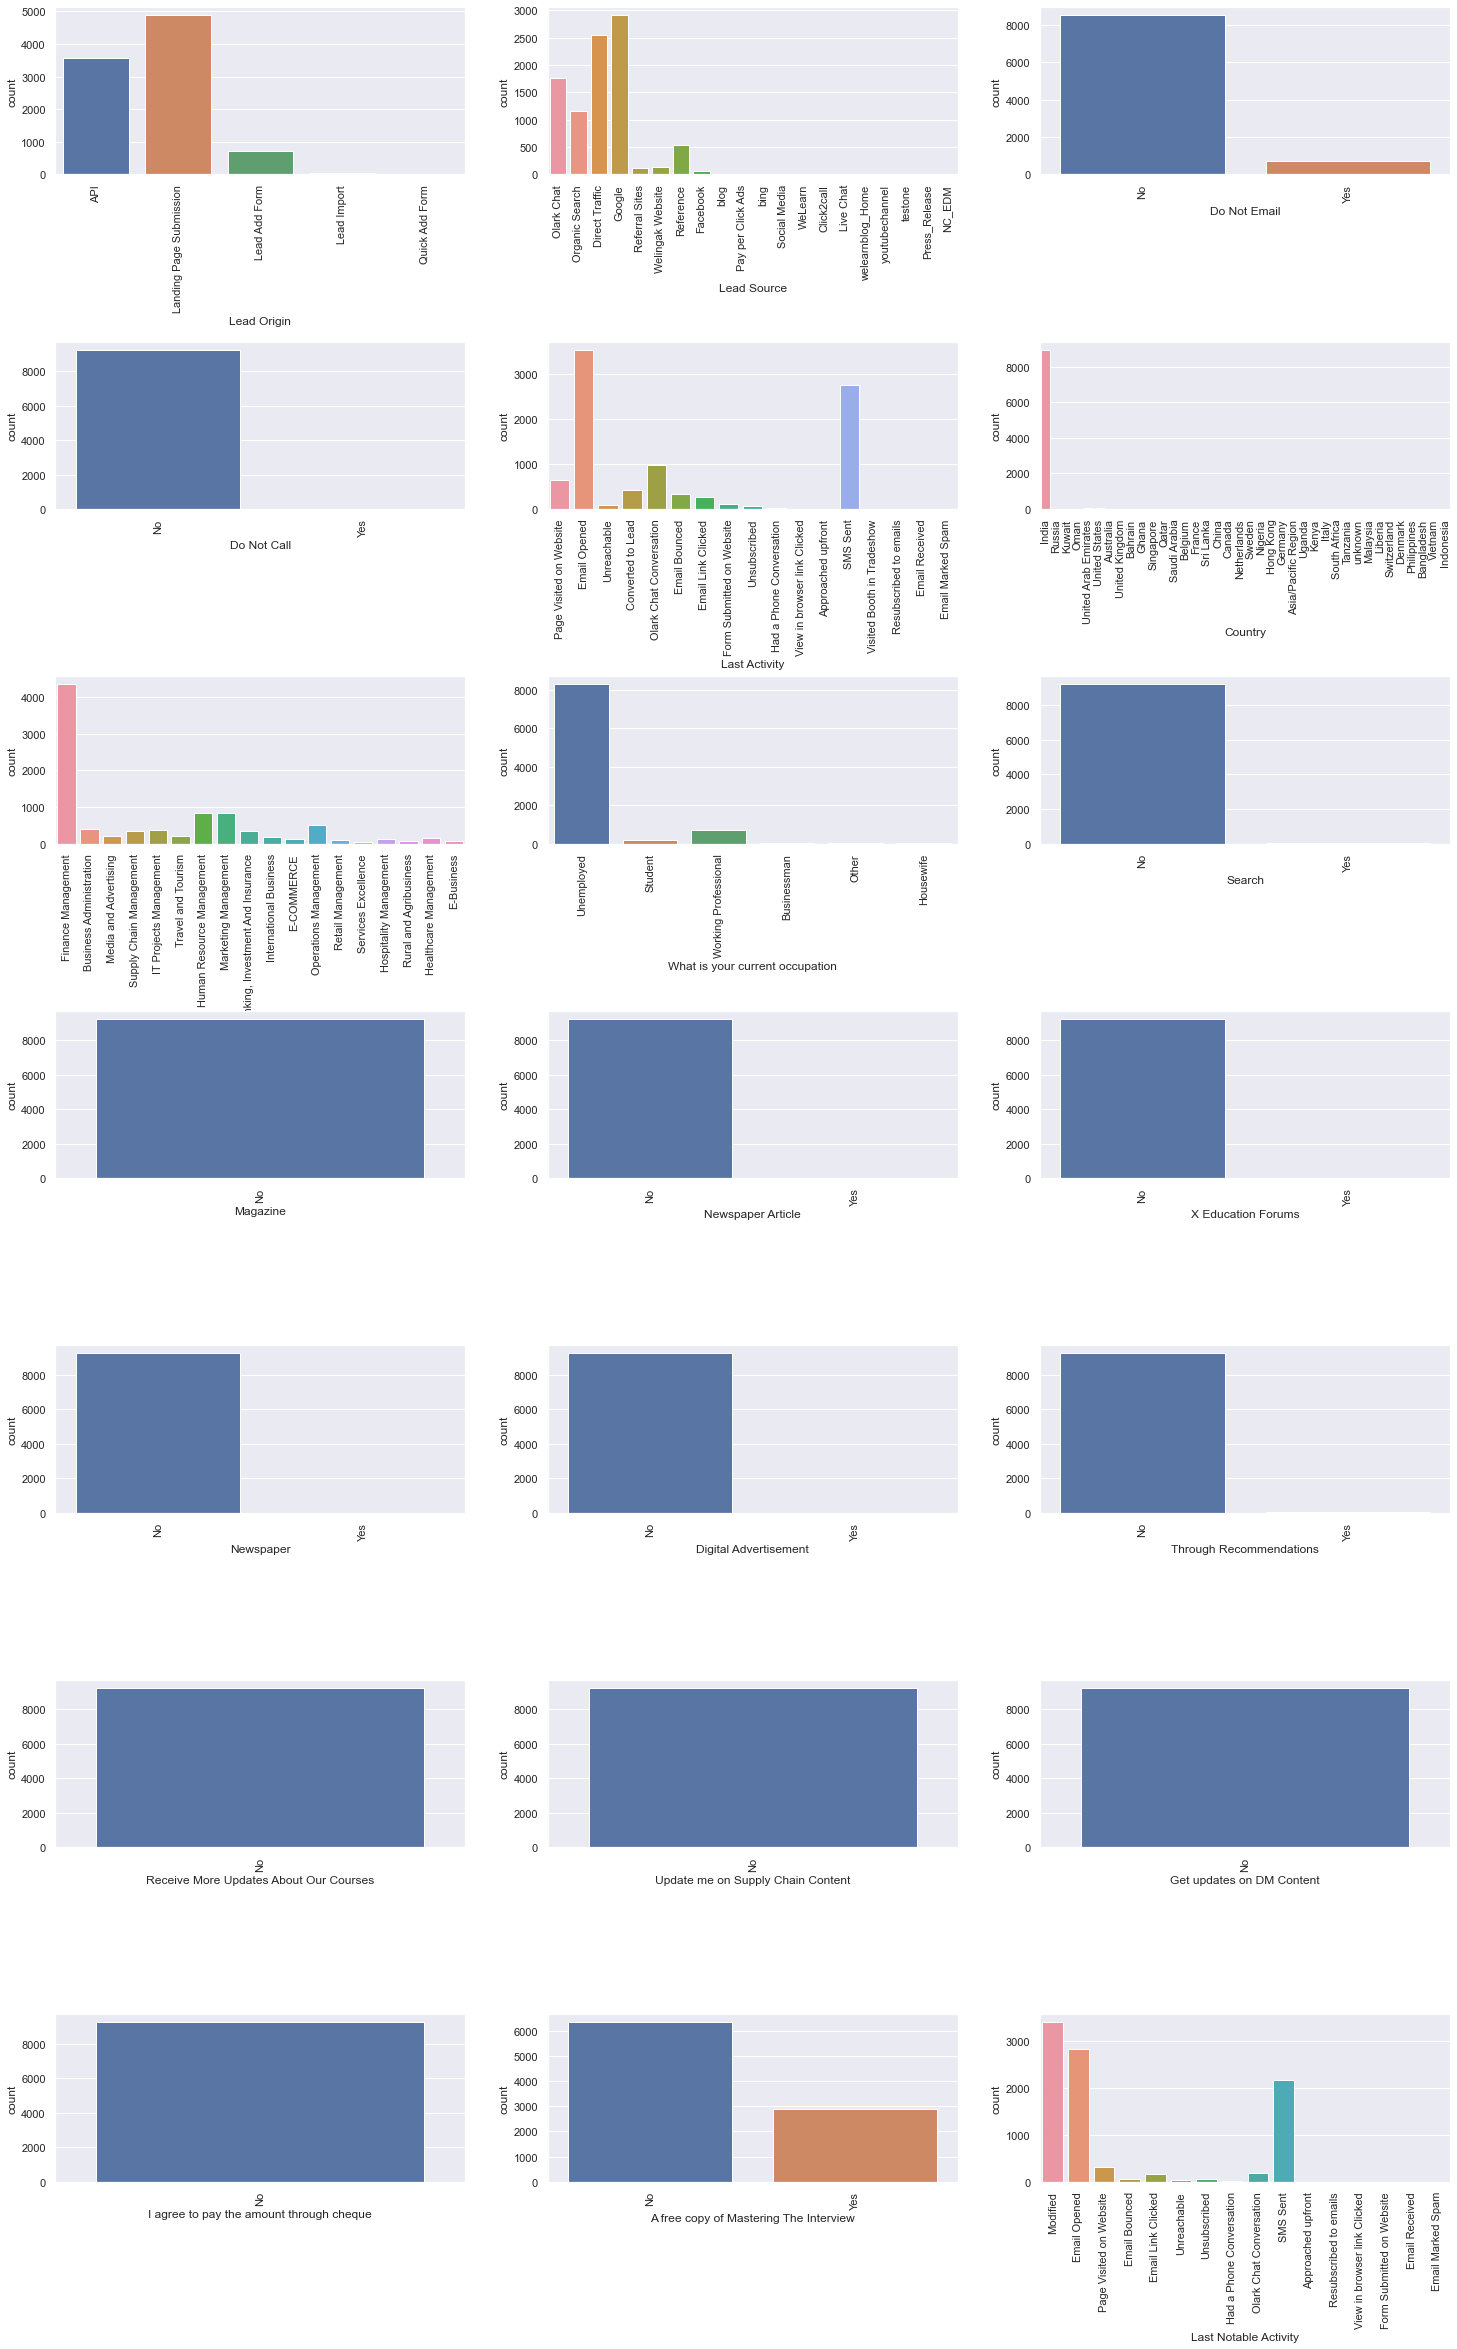

In [50]:
# plotting countplot for object dtype and histogram for number to get data distribution
plt.figure(figsize=(25,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(col_obj):
    plt.subplot(7,3, i[0]+1)
    sns.countplot(i[1],data=lead) 
    plt.xticks(rotation=90)
plt.show()

### Inference
- We can see that there are many colums which there are only one value . 
- We Can remove these colums as this will not help in model building.
- There are columns which have many categories more than five, we can impute new value 'Other' for which are occured less.

In [51]:
# Removing the columns containing one value respectively
lead=lead.drop(['What is your current occupation','Do Not Call','Do Not Email','Country','Search',\
                      'X Education Forums','Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],1)

In [52]:
# Dropping the columns which contain two variables, such as one has higher note and other has lower value
# Dropping these columns will be effective towards while applying model building
lead=lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',\
                      'Get updates on DM Content','I agree to pay the amount through cheque', ],1)
col_obj=lead.loc[:, lead.dtypes == np.object].columns

In [53]:
# Further, in lead scoring column we can see that there are many categories containing less value counts. 
# As applied before by imputing the highest value count, here for the less categories 'other' value is imputed for analysis.
col_dict_ls=dict(lead['Lead Source'].value_counts()<1000)

for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead['Lead Source']=lead['Lead Source'].replace(i,'Other')

In [54]:
# By changing in columns such as 'Last Activity', 'Last Notable Activity' & 'Specialization' the 'other' value is imputed for categories containing less value counts
# 'Last Activity'
col_dict_la=dict(lead['Last Activity'].value_counts()<300)

for i in col_dict_la.keys():
    if col_dict_la[i]==True:
        lead['Last Activity']=lead['Last Activity'].replace(i,'Other')

In [55]:
# 'Last Notable Activity'
col_dict_lna=dict(lead['Last Notable Activity'].value_counts()<500)

for i in col_dict_lna.keys():
    if col_dict_lna[i]==True:
        lead['Last Notable Activity']=lead['Last Notable Activity'].replace(i,'Other')

In [63]:
# 'Specialization'
col_dict_spec=dict(lead['Specialization'].value_counts()<350)

for i in col_dict_lna.keys():
    if col_dict_lna[i]==True:
        lead['Specialization']=lead['Specialization'].replace(i,'Other')

- Now by imputing the categorical values in the columns respectively, it is time to perform 'EDA'

### EXPLORATORY DATA ANALYSIS

#### UNIVARIATE ANALYSIS FOR CATEGORICAL DATA

- Now we currently do not know which of the columns are categorical data.
- So it is better to first perform info() function and separate the categorical variables alone.


In [57]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 794.

In [58]:
cols=lead.loc[:, lead.dtypes == np.object].columns

In [59]:
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

- As we can see that, the columns containing categorical values are 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','A free copy of Mastering The Interview' and 'Last Notable Activity' respectively.

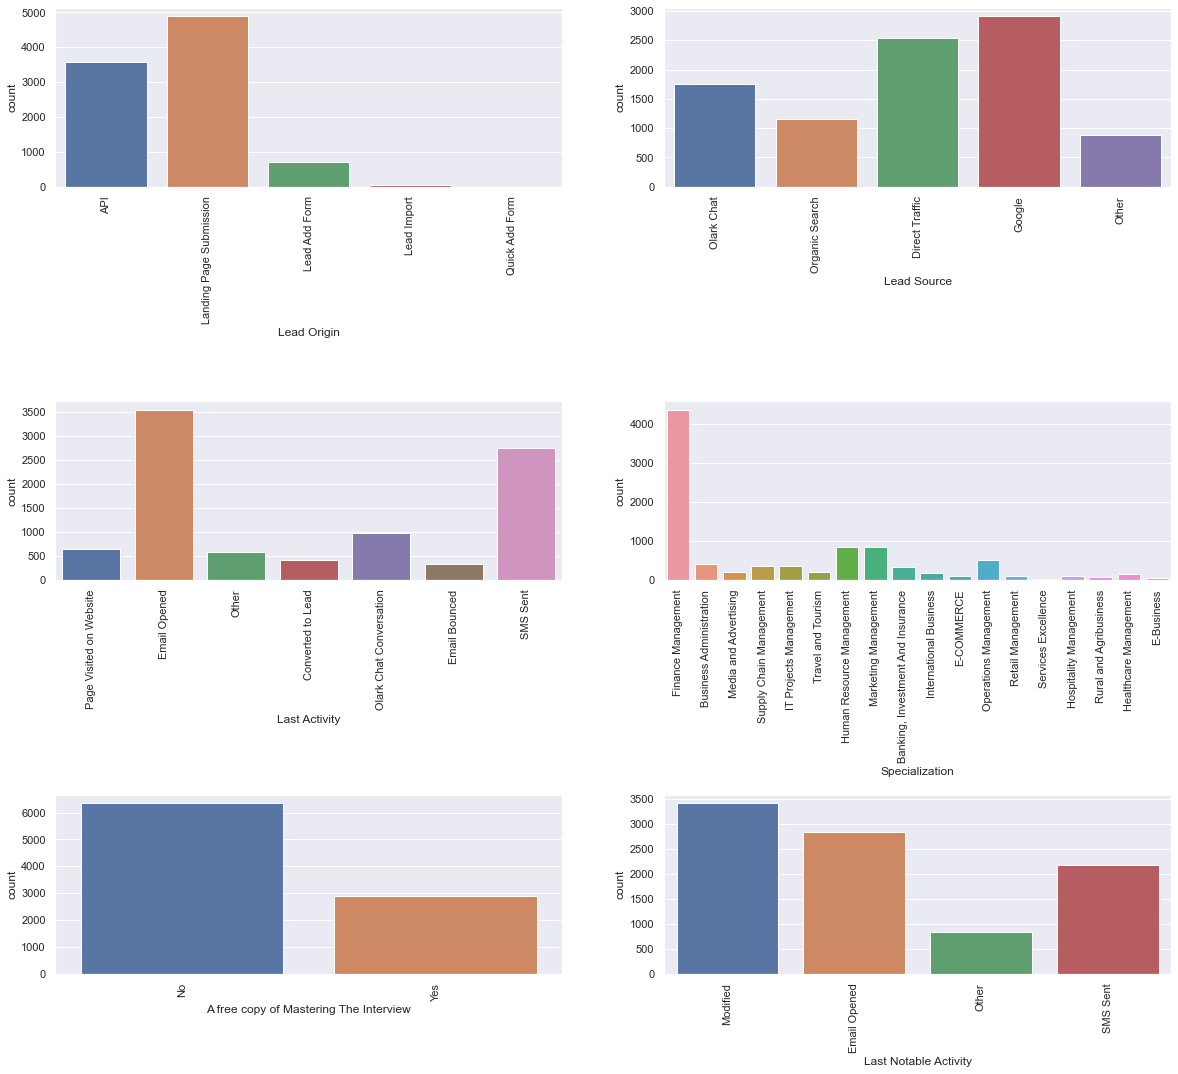

In [64]:
# Plotting the count plot for objective data type
plt.figure(figsize=(20,25))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(i[1],data=lead)
    plt.xticks(rotation=90)
plt.show()

### Inference
- From the data we can see that in column 'Lead Source', 'Google' & 'Direct Traffic' contains the highest values which clearly states that these two categories are of the main points of lead source.
- As for the 'Last Activity' column, the categories such as 'Email Sent' & 'SMS Sent' have higher values
- For the 'Specialization' column, most people opted for 'Finance Management'

#### Univariate Analysis for Continous Variable

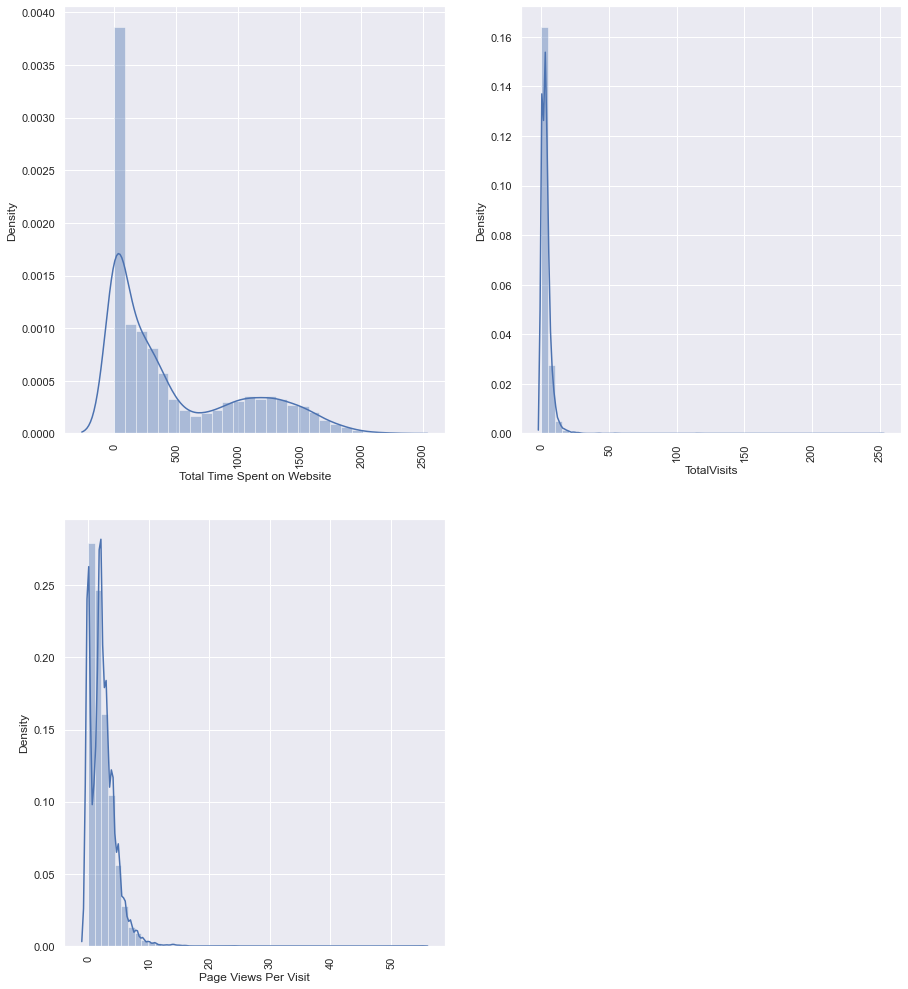

In [67]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(col_num):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(lead[i[1]])
    
    plt.xticks(rotation=90)

plt.show()

### Inference:
- From the numerical data, we can clearly state that none of the data is normally distributed.
- Outliers are present in Total Visits and Page Views Per Visit.

### Bivariate Analysis

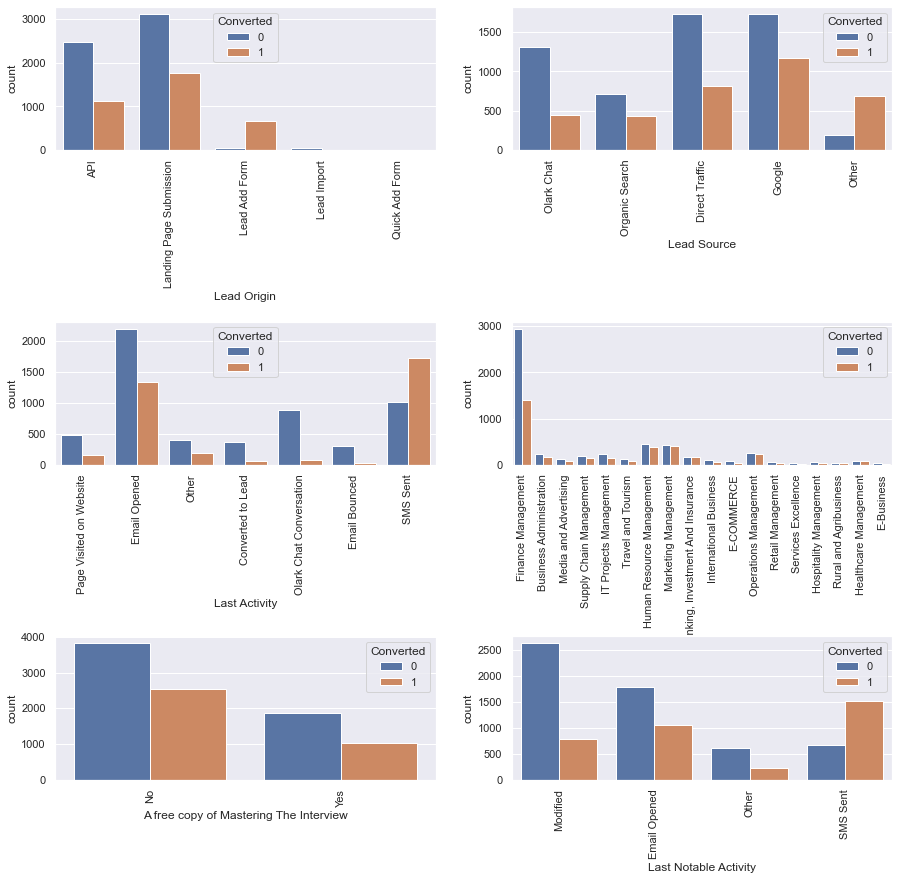

In [68]:
# Using bivariate analysis using target column
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = lead)
    plt.xticks(rotation=90)
plt.show()

### Inference:
- As we can see in column Lead Source, Direct Traffic and Google is higher whereaes Other is lower
- In Last Activity Email Opened category has higher value in blue region and SMS Sent category orange region is higher
- Last Notable Activity is almost similar to Last Activity for Email Opened and SMS Sent
- In Specialization, Finance Management is higher in the blue region

### Data Preparation

In [69]:
# As for now, the data is to preparaed for mapping the values, creating dummy variables for model preparation
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Media and Advertising,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified


- When comparing the Last Activity and Last Notable Activity Columns it is almost of the similar values as seen in before using plot function.
- So it is better to remove Last Notable Activity Column.


In [70]:
lead.drop('Last Notable Activity',1,inplace=True)

In [71]:
# Mapping
lead['A free copy of Mastering The Interview']=lead['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [72]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview
Lead Number,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,0
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,1
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Media and Advertising,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,0


- As we can see that Last Notable Activity column is removed and the interview column is mapped using 0 and 1 by Lambda function
- Now we can create dummy variables of categorical variables

In [73]:
# Creating Dummies
dummies=pd.get_dummies(lead)
dummies.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
660727,1,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
660719,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
660681,1,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
# As dummies are created, there will be duplicate columns present. So it is better to remove for further analysis
dummies=dummies.drop(['A free copy of Mastering The Interview','Lead Origin_Lead Add Form','Lead Source_Organic Search','Last Activity_Email Opened','Specialization_Operations Management'],1)

In [75]:
dummies.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
660728,0,5.0,674,2.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
660727,1,2.0,1532,2.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
660719,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
660681,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Training and Testing Sets of Data

In [76]:
X=dummies.iloc[:,1:]
y=dummies[['Converted']]

In [77]:
# Splitting the data based on training for 70% and testing for 30% respectively.
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=1)

In [78]:
# Using Scaler Function
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=\
scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

### Correlation
- Now as the splitting for testing and training, scaler function is created and transformed to a fit model, now this data can be used for creating a heatmap to find the correlation between the dataset.

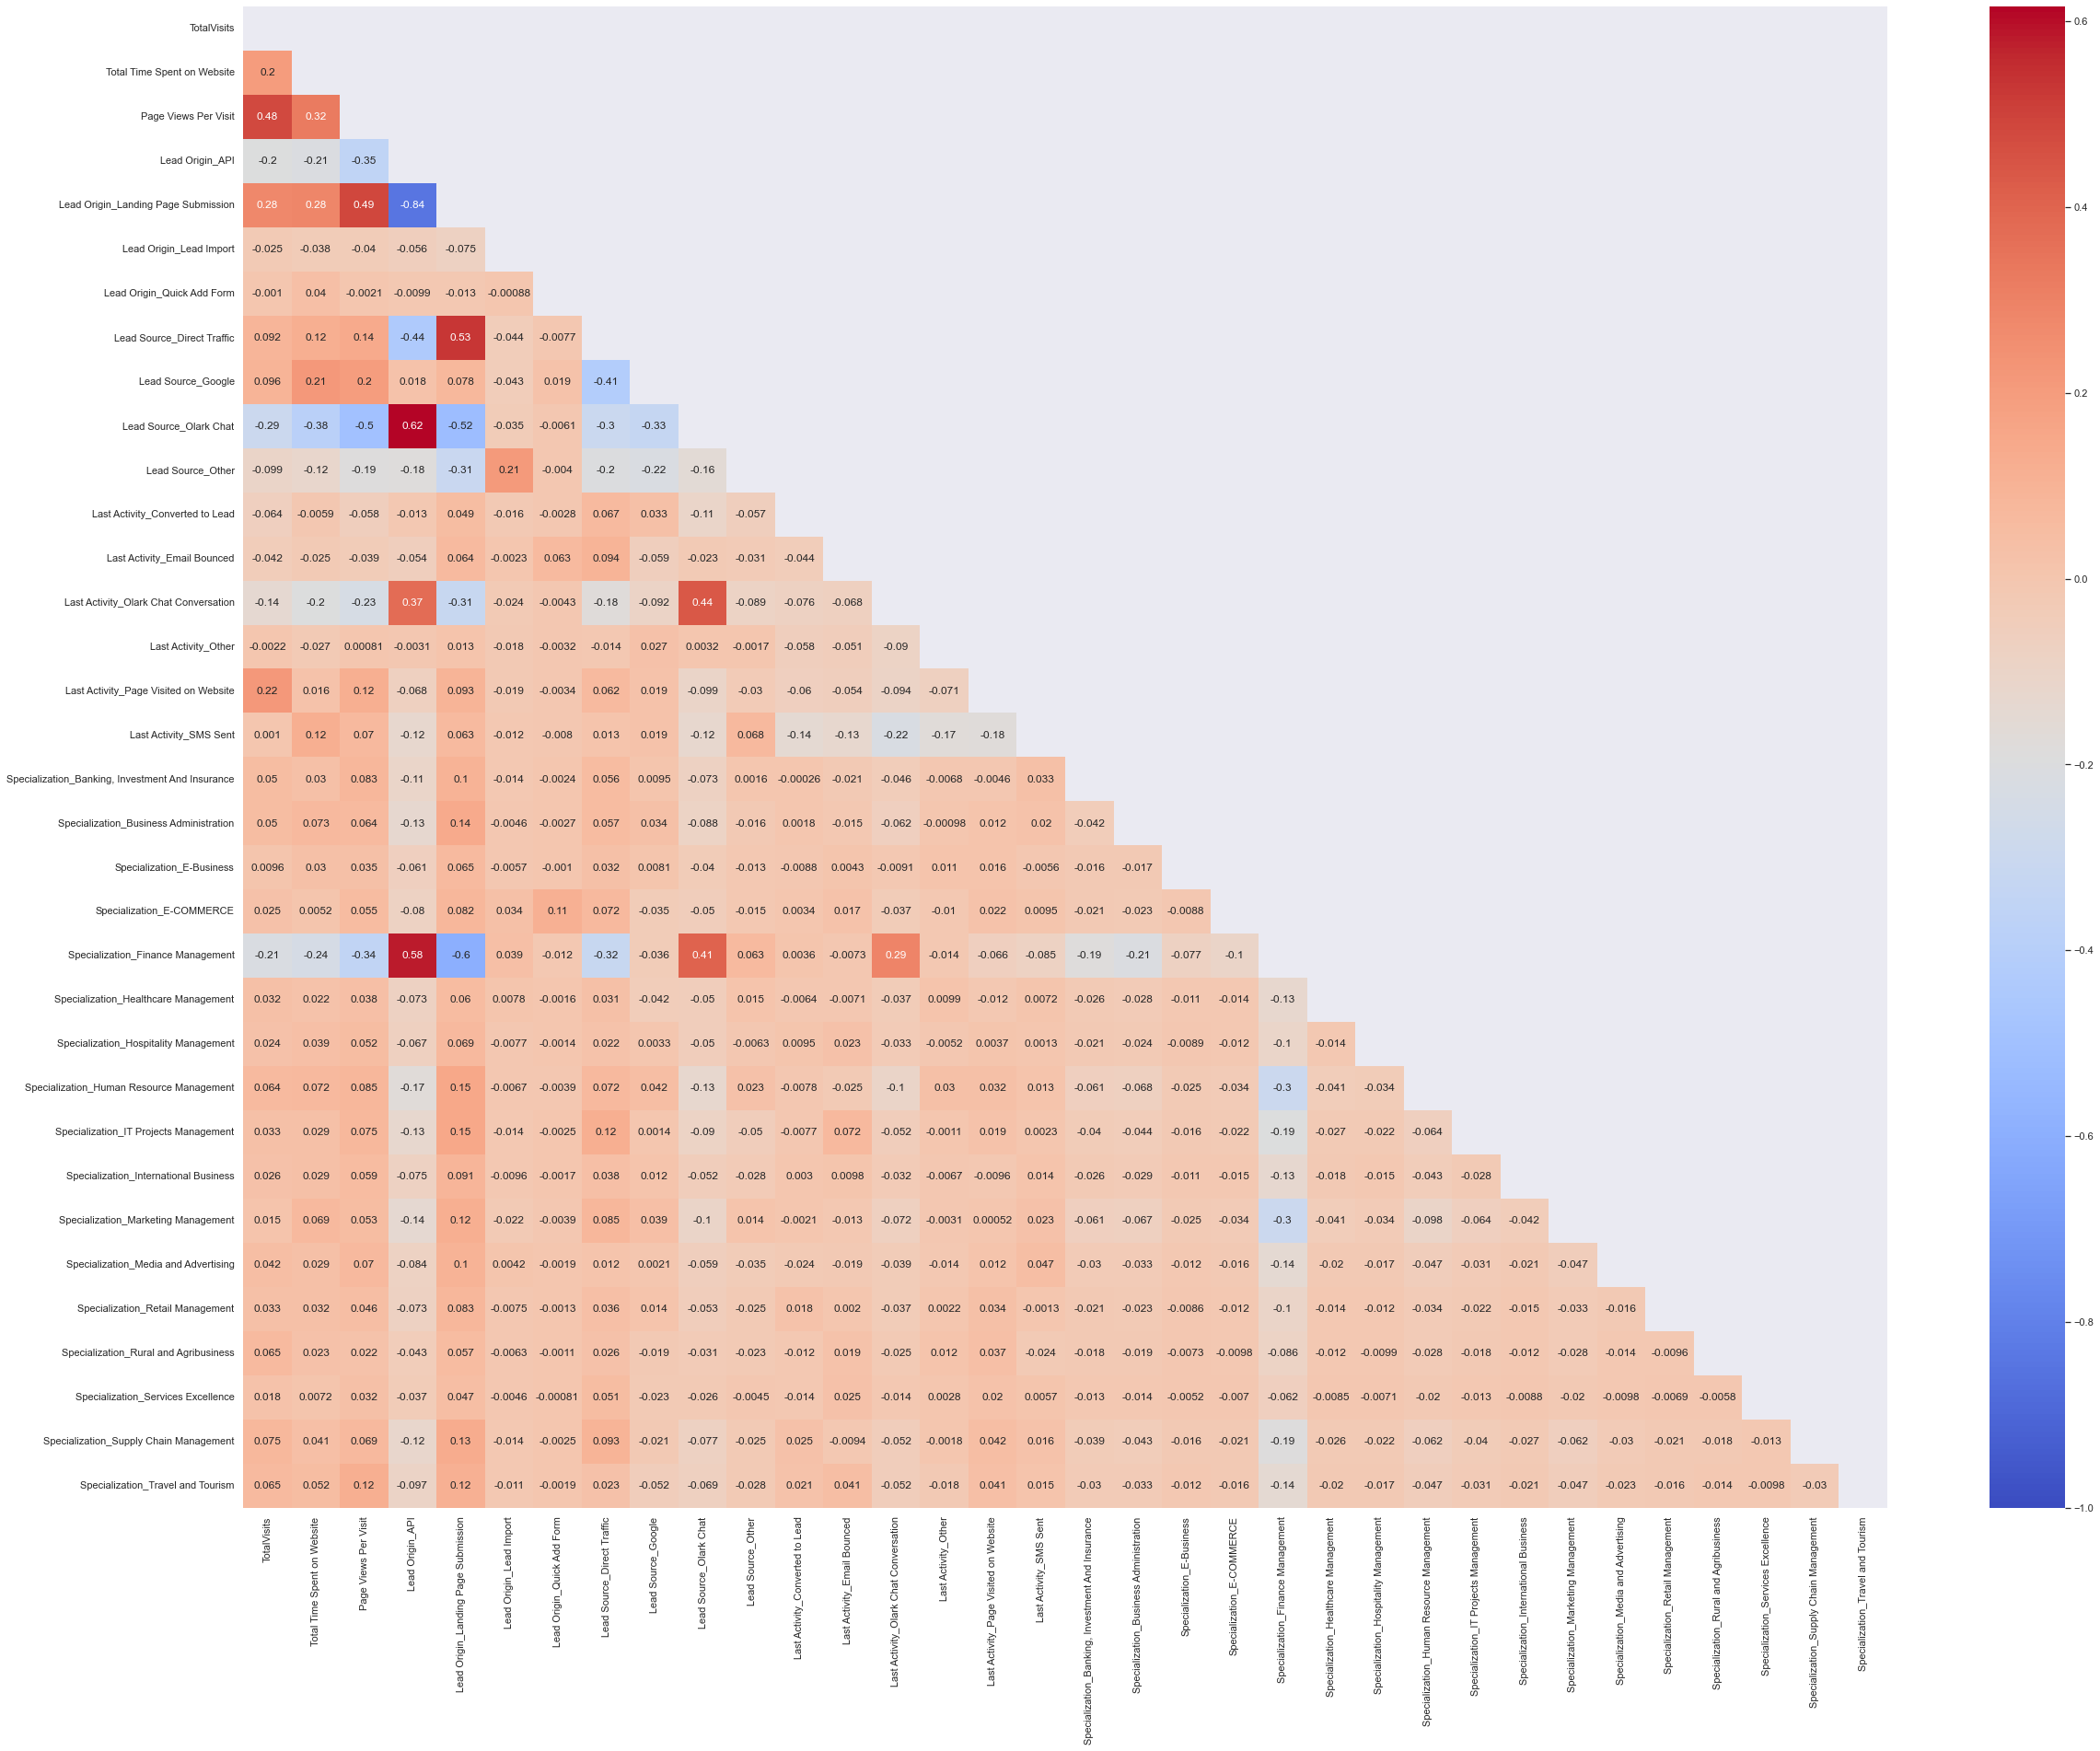

In [83]:
plt.figure(figsize = (40, 30))
mask = np.zeros(X_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(X_train.corr(), annot = True, vmin=-1,cmap='coolwarm',mask=mask)
plt.show()

### Inference:
- We can see that some values are highly correlated
- By using Recursive Feature Elimination we can determine whether to drop columns or not

In [86]:
# Logistic Regression
logreg=LogisticRegression()

In [97]:
rfe=RFE(logreg)    
rfe=rfe.fit(X_train,y_train)

In [98]:
rfe.support_

array([False,  True, False,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False, False,  True, False, False])

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 18),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Other', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 16),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_E-Business', False, 10),
 ('Specialization_E-COMMERCE', False, 7),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', False, 11),


In [100]:
# RFE variables will be used for modelling
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Other', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Services Excellence'],
      dtype='object')

In [101]:
# The RFE Selected variables should not be used for modelling
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Quick Add Form',
       'Lead Source_Google',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

### BUILDING LOGISTIC REGRESSION MODEL

#### Model 1

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.7
Date:                Sun, 16 Oct 2022   Deviance:                       5833.4
Time:                        03:33:27   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3478
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1771      0.296     10.737      0.000       2.597       3.757
Total Time Spent on Website               1.1066      0.038     28.889      0.000       1.032       1.182
Lead Origin_API                          -3.7481      0.291    -12.896      0.000      -4.318      -3.178
Lead Origin_Landing Page Submission      -4.0941      0.295    -13.879      0.000      -4.672      -3.516
Lead Origin_Lead Import                  -3.8315      0.500     -7.667      0.000      -4.811      -2.852
Lead Source_Direct Traffic               -0.3000      0.084     -3.574      0.000      -0.465      -0.135
Lead Source_Olark Chat                    0.9815      0.117      8.384      0.000       0.752       1.211
Lead Source_Other                         0.0164      0.244      0.067      0.946      -0.462       0.495
Last Activity_Converted to Lead          -1.0790      0.197     -5.471      0.000      -1.466      -0.692
Last Activity_Email Bounced              -1.8304      0.279     -6.563      0.000      -2.377      -1.284
Last Activity_Olark Chat Conversation    -1.7675      0.168    -10.547      0.000      -2.096      -1.439
Last Activity_Other                      -0.2643      0.137     -1.934      0.053      -0.532       0.004
Last Activity_Page Visited on Website    -0.6319      0.142     -4.441      0.000      -0.911      -0.353
Last Activity_SMS Sent                    1.0742      0.075     14.407      0.000       0.928       1.220
Specialization_Finance Management        -0.5004      0.085     -5.876      0.000      -0.667      -0.333
Specialization_Hospitality Management    -0.6134      0.311     -1.971      0.049      -1.223      -0.004
Specialization_International Business    -0.3505      0.244     -1.439      0.150      -0.828       0.127
Specialization_Services Excellence       -0.3199      0.513     -0.623      0.533      -1.326       0.686
=========================================================================================================
"""

In [103]:
# Calulation of VIF
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [104]:
vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,4.10
13,Specialization_Finance Management,3.11
2,Lead Origin_Landing Page Submission,2.96
5,Lead Source_Olark Chat,2.51
4,Lead Source_Direct Traffic,1.95
12,Last Activity_SMS Sent,1.72
9,Last Activity_Olark Chat Conversation,1.56
6,Lead Source_Other,1.29
0,Total Time Spent on Website,1.27
11,Last Activity_Page Visited on Website,1.19


In [105]:
# Lead Source_Other can be dropped with respect to higher p-value
col=col.drop('Lead Source_Other',1)

#### Model 2


In [106]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.7
Date:                Sun, 16 Oct 2022   Deviance:                       5833.4
Time:                        03:36:54   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3478
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1926      0.185     17.264      0.000       2.830       3.555
Total Time Spent on Website               1.1065      0.038     28.894      0.000       1.031       1.182
Lead Origin_API                          -3.7627      0.193    -19.481      0.000      -4.141      -3.384
Lead Origin_Landing Page Submission      -4.1092      0.191    -21.513      0.000      -4.484      -3.735
Lead Origin_Lead Import                  -3.8309      0.500     -7.668      0.000      -4.810      -2.852
Lead Source_Direct Traffic               -0.3003      0.084     -3.585      0.000      -0.465      -0.136
Lead Source_Olark Chat                    0.9805      0.116      8.443      0.000       0.753       1.208
Last Activity_Converted to Lead          -1.0792      0.197     -5.472      0.000      -1.466      -0.693
Last Activity_Email Bounced              -1.8309      0.279     -6.566      0.000      -2.378      -1.284
Last Activity_Olark Chat Conversation    -1.7674      0.168    -10.546      0.000      -2.096      -1.439
Last Activity_Other                      -0.2641      0.137     -1.932      0.053      -0.532       0.004
Last Activity_Page Visited on Website    -0.6316      0.142     -4.441      0.000      -0.910      -0.353
Last Activity_SMS Sent                    1.0740      0.074     14.421      0.000       0.928       1.220
Specialization_Finance Management        -0.5003      0.085     -5.876      0.000      -0.667      -0.333
Specialization_Hospitality Management    -0.6135      0.311     -1.971      0.049      -1.223      -0.004
Specialization_International Business    -0.3504      0.244     -1.439      0.150      -0.828       0.127
Specialization_Services Excellence       -0.3187      0.513     -0.621      0.534      -1.324       0.687
=========================================================================================================
"""

In [107]:
# Calculation of VIF value
vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.94
2,Lead Origin_Landing Page Submission,2.90
12,Specialization_Finance Management,2.83
5,Lead Source_Olark Chat,2.48
4,Lead Source_Direct Traffic,1.95
11,Last Activity_SMS Sent,1.61
8,Last Activity_Olark Chat Conversation,1.55
0,Total Time Spent on Website,1.25
10,Last Activity_Page Visited on Website,1.18
6,Last Activity_Converted to Lead,1.15


In [108]:
# Specialization_Services Excellence can be dropped as it has high p-value
col=col.drop('Specialization_Services Excellence',1)

#### Model 3

In [109]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.9
Date:                Sun, 16 Oct 2022   Deviance:                       5833.8
Time:                        03:40:15   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3478
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1915      0.185     17.260      0.000       2.829       3.554
Total Time Spent on Website               1.1066      0.038     28.898      0.000       1.032       1.182
Lead Origin_API                          -3.7635      0.193    -19.486      0.000      -4.142      -3.385
Lead Origin_Landing Page Submission      -4.1097      0.191    -21.517      0.000      -4.484      -3.735
Lead Origin_Lead Import                  -3.8312      0.500     -7.669      0.000      -4.810      -2.852
Lead Source_Direct Traffic               -0.3016      0.084     -3.602      0.000      -0.466      -0.137
Lead Source_Olark Chat                    0.9805      0.116      8.444      0.000       0.753       1.208
Last Activity_Converted to Lead          -1.0780      0.197     -5.467      0.000      -1.465      -0.692
Last Activity_Email Bounced              -1.8336      0.279     -6.577      0.000      -2.380      -1.287
Last Activity_Olark Chat Conversation    -1.7683      0.168    -10.553      0.000      -2.097      -1.440
Last Activity_Other                      -0.2643      0.137     -1.934      0.053      -0.532       0.003
Last Activity_Page Visited on Website    -0.6323      0.142     -4.447      0.000      -0.911      -0.354
Last Activity_SMS Sent                    1.0732      0.074     14.414      0.000       0.927       1.219
Specialization_Finance Management        -0.4979      0.085     -5.854      0.000      -0.665      -0.331
Specialization_Hospitality Management    -0.6112      0.311     -1.964      0.050      -1.221      -0.001
Specialization_International Business    -0.3480      0.244     -1.429      0.153      -0.825       0.129
=========================================================================================================
"""

In [110]:
# Calculation of VIF 
vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.94
2,Lead Origin_Landing Page Submission,2.89
12,Specialization_Finance Management,2.83
5,Lead Source_Olark Chat,2.48
4,Lead Source_Direct Traffic,1.95
11,Last Activity_SMS Sent,1.61
8,Last Activity_Olark Chat Conversation,1.55
0,Total Time Spent on Website,1.25
10,Last Activity_Page Visited on Website,1.18
6,Last Activity_Converted to Lead,1.15


In [111]:
### Specialization_International Business can be dropped as it has higher p-value
col=col.drop('Specialization_International Business',1)

#### Model 4

In [112]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2917.9
Date:                Sun, 16 Oct 2022   Deviance:                       5835.9
Time:                        03:43:17   Pearson chi2:                 6.70e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3476
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1817      0.185     17.232      0.000       2.820       3.544
Total Time Spent on Website               1.1067      0.038     28.899      0.000       1.032       1.182
Lead Origin_API                          -3.7657      0.193    -19.507      0.000      -4.144      -3.387
Lead Origin_Landing Page Submission      -4.1127      0.191    -21.546      0.000      -4.487      -3.739
Lead Origin_Lead Import                  -3.8291      0.499     -7.666      0.000      -4.808      -2.850
Lead Source_Direct Traffic               -0.2998      0.084     -3.581      0.000      -0.464      -0.136
Lead Source_Olark Chat                    0.9813      0.116      8.452      0.000       0.754       1.209
Last Activity_Converted to Lead          -1.0791      0.197     -5.470      0.000      -1.466      -0.692
Last Activity_Email Bounced              -1.8383      0.279     -6.579      0.000      -2.386      -1.291
Last Activity_Olark Chat Conversation    -1.7683      0.168    -10.555      0.000      -2.097      -1.440
Last Activity_Other                      -0.2634      0.137     -1.929      0.054      -0.531       0.004
Last Activity_Page Visited on Website    -0.6298      0.142     -4.430      0.000      -0.908      -0.351
Last Activity_SMS Sent                    1.0723      0.074     14.407      0.000       0.926       1.218
Specialization_Finance Management        -0.4862      0.085     -5.743      0.000      -0.652      -0.320
Specialization_Hospitality Management    -0.5988      0.311     -1.925      0.054      -1.209       0.011
=========================================================================================================
"""

In [113]:
# Calculation of VIF
vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.92
2,Lead Origin_Landing Page Submission,2.85
12,Specialization_Finance Management,2.80
5,Lead Source_Olark Chat,2.48
4,Lead Source_Direct Traffic,1.95
11,Last Activity_SMS Sent,1.61
8,Last Activity_Olark Chat Conversation,1.55
0,Total Time Spent on Website,1.25
10,Last Activity_Page Visited on Website,1.18
6,Last Activity_Converted to Lead,1.15


In [114]:
# Specialization_Hospitality Management can be dropped as it has high p-value
col=col.drop('Specialization_Hospitality Management',1)

#### Model 5

In [116]:
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.8
Date:                Sun, 16 Oct 2022   Deviance:                       5839.6
Time:                        03:49:15   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3472
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1632      0.184     17.163      0.000       2.802       3.524
Total Time Spent on Website               1.1043      0.038     28.881      0.000       1.029       1.179
Lead Origin_API                          -3.7588      0.193    -19.485      0.000      -4.137      -3.381
Lead Origin_Landing Page Submission      -4.1077      0.191    -21.529      0.000      -4.482      -3.734
Lead Origin_Lead Import                  -3.8200      0.499     -7.651      0.000      -4.799      -2.841
Lead Source_Direct Traffic               -0.2952      0.084     -3.529      0.000      -0.459      -0.131
Lead Source_Olark Chat                    0.9800      0.116      8.444      0.000       0.753       1.207
Last Activity_Converted to Lead          -1.0837      0.197     -5.498      0.000      -1.470      -0.697
Last Activity_Email Bounced              -1.8496      0.280     -6.615      0.000      -2.398      -1.302
Last Activity_Olark Chat Conversation    -1.7695      0.168    -10.562      0.000      -2.098      -1.441
Last Activity_Other                      -0.2601      0.136     -1.906      0.057      -0.528       0.007
Last Activity_Page Visited on Website    -0.6279      0.142     -4.420      0.000      -0.906      -0.349
Last Activity_SMS Sent                    1.0725      0.074     14.414      0.000       0.927       1.218
Specialization_Finance Management        -0.4742      0.084     -5.618      0.000      -0.640      -0.309
=========================================================================================================
"""

In [117]:
# Calculation of VIF
vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.91
2,Lead Origin_Landing Page Submission,2.83
12,Specialization_Finance Management,2.79
5,Lead Source_Olark Chat,2.48
4,Lead Source_Direct Traffic,1.95
11,Last Activity_SMS Sent,1.61
8,Last Activity_Olark Chat Conversation,1.55
0,Total Time Spent on Website,1.25
10,Last Activity_Page Visited on Website,1.18
6,Last Activity_Converted to Lead,1.15


In [118]:
# Last Activity_Other can be removed as it has higher p-value
col = col.drop('Last Activity_Other',1)

#### Model 6

In [119]:
X_train_sm=sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2921.7
Date:                Sun, 16 Oct 2022   Deviance:                       5843.3
Time:                        03:51:33   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3468
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.1312      0.183     17.072      0.000       2.772       3.491
Total Time Spent on Website               1.1058      0.038     28.931      0.000       1.031       1.181
Lead Origin_API                          -3.7629      0.193    -19.512      0.000      -4.141      -3.385
Lead Origin_Landing Page Submission      -4.1129      0.191    -21.561      0.000      -4.487      -3.739
Lead Origin_Lead Import                  -3.7995      0.500     -7.603      0.000      -4.779      -2.820
Lead Source_Direct Traffic               -0.2914      0.084     -3.487      0.000      -0.455      -0.128
Lead Source_Olark Chat                    0.9777      0.116      8.429      0.000       0.750       1.205
Last Activity_Converted to Lead          -1.0495      0.196     -5.344      0.000      -1.434      -0.665
Last Activity_Email Bounced              -1.8154      0.279     -6.503      0.000      -2.363      -1.268
Last Activity_Olark Chat Conversation    -1.7326      0.167    -10.406      0.000      -2.059      -1.406
Last Activity_Page Visited on Website    -0.5932      0.141     -4.207      0.000      -0.870      -0.317
Last Activity_SMS Sent                    1.1078      0.072     15.339      0.000       0.966       1.249
Specialization_Finance Management        -0.4732      0.084     -5.610      0.000      -0.638      -0.308
=========================================================================================================
"""

In [120]:
# Calculation of VIF
vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.82
11,Specialization_Finance Management,2.79
2,Lead Origin_Landing Page Submission,2.65
5,Lead Source_Olark Chat,2.48
4,Lead Source_Direct Traffic,1.94
10,Last Activity_SMS Sent,1.53
8,Last Activity_Olark Chat Conversation,1.51
0,Total Time Spent on Website,1.25
9,Last Activity_Page Visited on Website,1.16
6,Last Activity_Converted to Lead,1.13


### Inference
- We can see that p-value is less than 0.05 and VIF is less than 5
- This can be taken as a final model

In [121]:
# Predicting Values on Y-train dataset
y_train_pred = logm6.predict(X_train_sm).values.reshape(-1)

In [122]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.119697,609431
1,0,0.055174,631817
2,0,0.062221,596164
3,0,0.140882,646570
4,0,0.037953,643974


In [123]:
# Now as the predicition for the final data set for testing is determined a cutoff such as 0.5 by taking it as 0 or 1
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)

In [124]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.119697,609431,0
1,0,0.055174,631817,0
2,0,0.062221,596164,0
3,0,0.140882,646570,0
4,0,0.037953,643974,0


In [125]:
# After the prediction is completed, it is time to find out the accuracy, sensitivity and specificity of the dataset
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [126]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)
print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))

Accuracy: 0.79004329004329, Sensitivity 0.6317923763179237, specitiy 0.8875562218890555


In [127]:
# By taking a cutoff as 0.5, we get a low sensitivity as 0.63

#### Confusion Matrix

In [128]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3552,  450],
       [ 908, 1558]], dtype=int64)

In [129]:
# Now we have built the confusion matrix we can find true positive TP, true negative TN, false positive FP and false negative FN.
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [130]:
# False Positive Rate
print(FP/ float(TN+FP))

0.11244377811094453


In [131]:
# Positive Predictive Value
print (TP / float(TP+FP))

0.7758964143426295


In [132]:
# Negative Predictive Value
print (TN / float(TN+ FN))

0.7964125560538117


### ROC Curve

In [133]:
# Now by prediciting the ROC Curve we can finalize the data
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

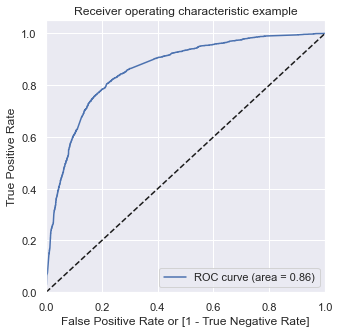

In [135]:
# Structuring of ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Optimal Point of the Dataset

In [136]:
# Now in the previous data we created predicted the final training model by taking the cutoff as 0.5.
# But in this case, we should use random proability values to create columns of different values
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.119697,609431,0,1,1,0,0,0,0,0,0,0,0
1,0,0.055174,631817,0,1,0,0,0,0,0,0,0,0,0
2,0,0.062221,596164,0,1,0,0,0,0,0,0,0,0,0
3,0,0.140882,646570,0,1,1,0,0,0,0,0,0,0,0
4,0,0.037953,643974,0,1,0,0,0,0,0,0,0,0,0


In [137]:
# Calculation of accuracy, sensitivity and specificity using different proability values
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.568800  0.973236  0.319590
0.2   0.2  0.696506  0.915653  0.561469
0.3   0.3  0.778602  0.833739  0.744628
0.4   0.4  0.800711  0.754663  0.829085
0.5   0.5  0.790043  0.631792  0.887556
0.6   0.6  0.781385  0.563666  0.915542
0.7   0.7  0.754638  0.448905  0.943028
0.8   0.8  0.733148  0.358070  0.964268
0.9   0.9  0.674861  0.168289  0.987006


<Figure size 1440x1080 with 0 Axes>

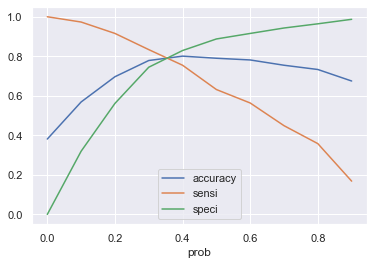

In [138]:
# By plotting these values using sensitivity, accuracy and specificity we can take the final cutoff of the model
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Now we can take the final cutoff as 3.5

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.119697,609431,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.055174,631817,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.062221,596164,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.140882,646570,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.037953,643974,0,1,0,0,0,0,0,0,0,0,0,0


In [140]:
# Now to know the value of accuracy, sensitivity and specificity of the dataset
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specifitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7897340754483612, Sensitivity 0.7903487429034874, specifitiy 0.7893553223388305  


In [141]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3552,  450],
       [ 908, 1558]], dtype=int64)

In [142]:
# Calculate the Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6980659025787965

In [143]:
# Calculate the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7903487429034874

#### Precision Recall Curve

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

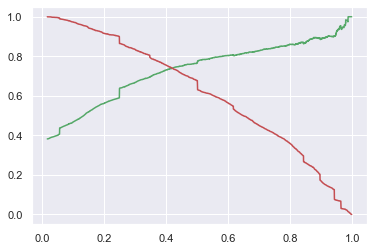

In [145]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
plt.show()

- We get the Cutoff as 0.35 in Precision Recall Threshold

### Prediction on Test Set

In [146]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [147]:
# Scaling on test set is perfomed, constants can be added and made predicitons according to it.
X_test_sm = sm.add_constant(X_test[col])

y_test_pred = logm6.predict(X_test_sm)
y_test_pred[:10]

Lead Number
639211    0.895712
590711    0.870901
644174    0.456991
641392    0.278929
587955    0.805441
593130    0.105265
648319    0.055174
636722    0.932848
648231    0.825259
637858    0.221117
dtype: float64

In [148]:
# These values are in an array. 
# Now we convert the array into dataframe for y_pred_test and y_test
y_pred_test = pd.DataFrame(y_test_pred)

y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [149]:
# Remove the index for both dataframes
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Now by appending both the dataframes
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [151]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,639211,0.895712
1,1,590711,0.870901
2,1,644174,0.456991
3,0,641392,0.278929
4,1,587955,0.805441


In [152]:
# Now it is clear, that both the data are appended and presented in a dataframe format.
# Now by takinf final test pred using the cut off 0.35
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [153]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,639211,0.895712,1
1,1,590711,0.870901,1
2,1,644174,0.456991,1
3,0,641392,0.278929,0
4,1,587955,0.805441,1


In [154]:
# Metrics of the dataset
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)

In [155]:
# Now to know the value of the test set and determine whether it has good values or not
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7857142857142857, Sensitivity 0.7890410958904109, specitiy 0.7835420393559929  


### Inference
- We can see that the test model is also doing fine.
- Our model is giving almost 80 percent sensitivity which is good.
- This means that 80 percent of the model is able to predicted in a correct way.

### Lead Score in the Dataframe
- Making a new dataframe with lead score with respect to the Lead Number

In [156]:
lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['Lead Number','Converted_Prob']]
df2=y_pred_final[['Lead Number','Converted_Prob']]

In [157]:
lead_scorer_df=df1.append(df2,ignore_index=True)

In [158]:
# Multiplying by 100 the lead score value is being assigned
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_Prob'].apply(lambda x: round((x*100),2))

In [159]:
# Drop Converted_Prob
lead_scorer_df.drop('Converted_Prob',1,inplace=True)
lead_scorer_df.head()

,Lead Number,Lead Score
0,609431,11.97
1,631817,5.52
2,596164,6.22
3,646570,14.09
4,643974,3.80


- The Lead Score with respect to the Lead Number is determined and presented in a dataframe format

### Conclusion

- From the dataset using regression models, calculating VIF, splitting of train and test data & visualizing the data, we are finally able to determine the most important variables in potential buyers
- Total Time Spent on the Website.
- The Total Number of Visits.
- The Lead Source of having google, direct traffic and Olark Chart as higher values.
- The Last Activity containing higher values were SMS and Olark Chat Conversation.
- Lead Origin is Lead Import